## Lead Scoring Case Study

## Step 1: Importing  Data

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing Leads.csv data into data frame object Leads
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Data Understanding

###  Inspecting the Dataframe

In [4]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Step 3 : Data Cleaning

###  Checking for Duplicate Data

In [8]:
# Verifying for any duplicate rows in dataframe
leads[leads.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


- No duplicates found when all columns are considered.

In [9]:
# Dropping Prospect ID & Lead Number as these are only sequence numbers that are not used for predictions
leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)
leads.shape

(9240, 35)

In [10]:
# Re checking duplicates after removing id's
duplicateData = leads[leads.duplicated()]
duplicateData.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
16,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
47,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
49,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
83,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
190,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified


In [11]:
duplicateData.shape

(1281, 35)

- It shows that 1281 rows have duplicate data

### Removing duplicate rows

In [12]:
# Dropping duplicate rows
leads=leads.drop_duplicates()

In [13]:
# Verifying size after removal of duplicates
leads.shape

(7959, 35)

In [14]:
# Verifying all duplicates rows has been removed
leads[leads.duplicated()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


###  Missing Value Imputation

In [15]:
# Let's check for total rows contaning 'Select' value in any column
leads[leads.isin(['Select']).any(axis=1)].shape

(5483, 35)

In [16]:
# Verifying the columns which have the value 'Select'
leads[leads.isin(['Select']).any(axis=1)]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.50,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent


In [17]:
#Converting 'Select' values to NaN, since it is equivalent to a NULL value (No option was selected)
leads = leads.replace('Select', np.nan)

In [18]:
# Let's check for total rows contaning 'Select' value in any column
leads[leads.isin(['Select']).any(axis=1)].shape

(0, 35)

In [19]:
# Let's check how much percentage of  null values per each column in descending order of percentage
nullcount = round(((leads.isnull().sum())/len(leads))*100,2).to_frame('TotPercentage')
# sorting the values by TotPercentage in descending order
nullcount.sort_values(by='TotPercentage',ascending=False)

,TotPercentage
How did you hear about X Education,75.00
Lead Profile,71.88
Lead Quality,46.55
Asymmetrique Activity Score,44.16
Asymmetrique Profile Score,44.16
Asymmetrique Profile Index,44.16
Asymmetrique Activity Index,44.16
City,30.29
Tags,30.18
Specialization,27.52


### Dropping columns having more than 40% null values

In [20]:
# Dropping columns having more than 40% null values  based on above result
for i in leads.columns:
    per = ((leads[i].isnull().sum())/len(leads))*100
    
    if per >= 40:
        print("Dropped the following columns:")
        print(i)
        leads.drop(i,axis=1,inplace=True)

Dropped the following columns:
How did you hear about X Education
Dropped the following columns:
Lead Quality
Dropped the following columns:
Lead Profile
Dropped the following columns:
Asymmetrique Activity Index
Dropped the following columns:
Asymmetrique Profile Index
Dropped the following columns:
Asymmetrique Activity Score
Dropped the following columns:
Asymmetrique Profile Score


In [21]:
# Verifying columns after dropping above ones
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [22]:
# Re-checking list of columns having null values after removing above 45% percentage columns
nullcount = round(((leads.isnull().sum())/len(leads))*100,2).to_frame('TotPercentage')
nullcount.sort_values(by='TotPercentage',ascending=False)

,TotPercentage
City,30.29
Tags,30.18
Specialization,27.52
What matters most to you in choosing a course,24.75
What is your current occupation,24.51
Country,14.83
TotalVisits,1.72
Page Views Per Visit,1.72
Last Activity,1.29
Lead Source,0.41


- __Conclusion__
    - Dropped all columns which have more than 40% of null values as they cannot be used for predictions
    - Remaining columns having null values below 40% needs further analysis to perform any of below action 
        - Replace with mode/median
        - Delete the columns 
        - Replace with 'Not Specified' as customer has not selected any option

## Step 4:  Exploratory Data Analysis

In [23]:
#checking value counts of City column
leads['City'].value_counts(dropna=False) 

Mumbai                         3209
NaN                            2411
Thane & Outskirts               745
Other Cities                    685
Other Cities of Maharashtra     455
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
# Initally Replacing null value with 'Not Speficifed' for identification of null value data in count plot
leads['City'] = leads['City'].replace(np.NaN,'Not Specified')

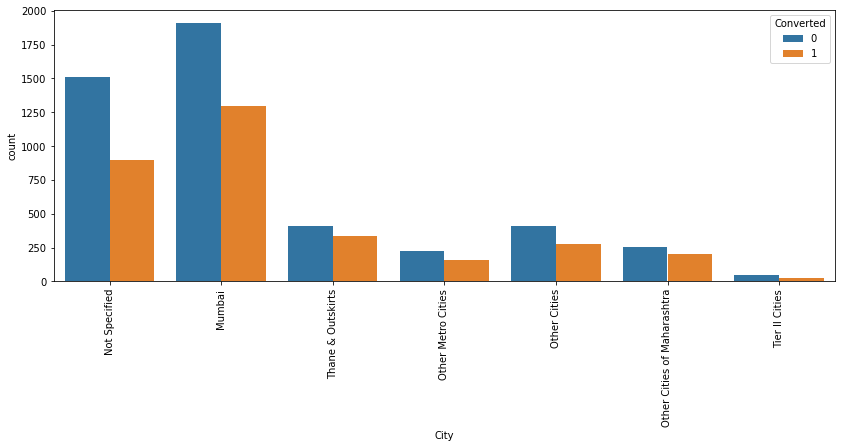

In [25]:
# Plottin countplot for City vs Converted  to understand the distribution
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "City", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

- We can see that Converted column has a similar trend for all kinds of cities inclusing the 'Not Specified' category.
- We cannot update null values with mode (Mumbai) as the data will become biased towards Mumbai City.

In [26]:
#checking value counts of Specialization column
leads['Specialization'].value_counts(dropna=False)

NaN                                  2190
Finance Management                    957
Human Resource Management             831
Marketing Management                  805
Operations Management                 492
Business Administration               398
IT Projects Management                366
Supply Chain Management               348
Banking, Investment And Insurance     333
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
# Replacing null value  'Not Specified' for Specialization column as lead not selected any specilaization
# and also null value count percentage is more than mode value count
leads['Specialization'] = leads['Specialization'].replace(np.NaN,'Not Specified')

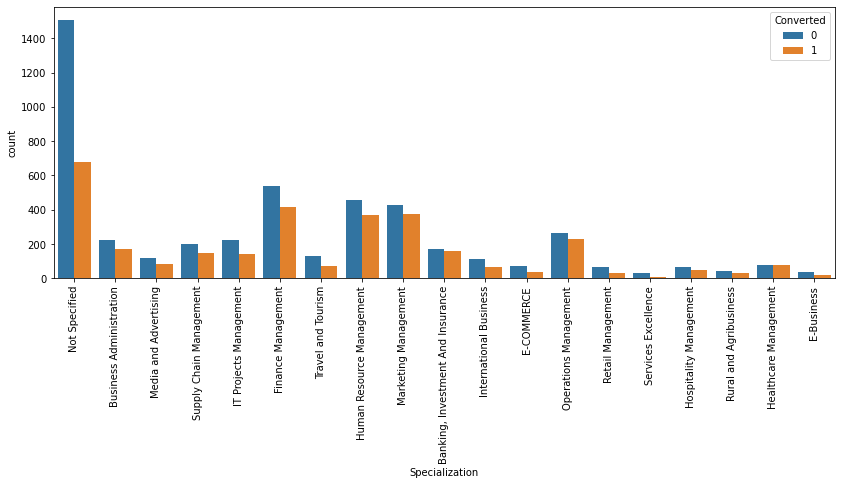

In [28]:
# Plotting countplot for Specialization vs Converted to understand the distribution
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Specialization", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [29]:
#checking value counts of Tags column
leads['Tags'].value_counts(dropna=False)

NaN                                                  2402
Will revert after reading the email                  1924
Ringing                                              1143
Interested in other courses                           473
Already a student                                     407
Closed by Horizzon                                    347
switched off                                          239
Busy                                                  186
Lost to EINS                                          172
Not doing further education                           143
Interested  in full time MBA                          116
Graduation in progress                                108
invalid number                                         83
Diploma holder (Not Eligible)                          60
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [30]:
# Replacing null value with mode value 'Not Specified' for Tags column
leads['Tags'] = leads['Tags'].replace(np.NaN,'Not Specified')

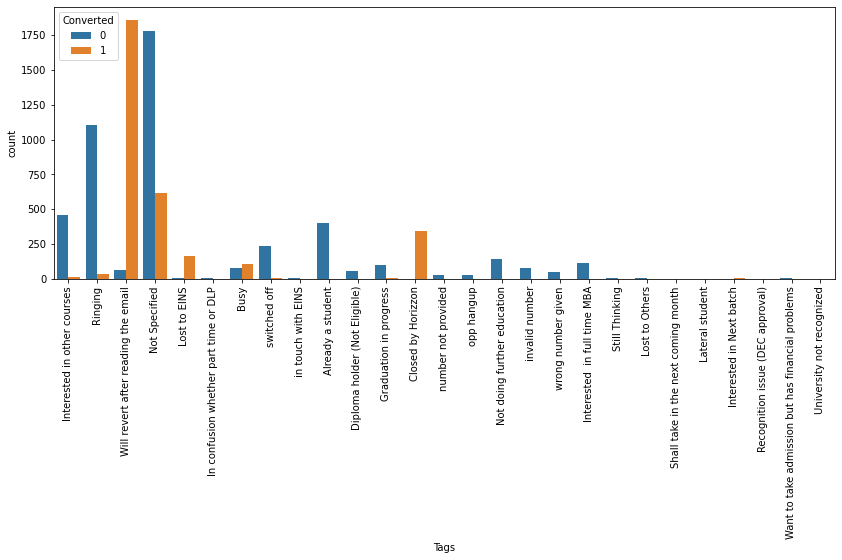

In [31]:
# Plottin countplot for Tags vs Converted  to understand the distribution
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Tags", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

#### Merging less count categories into single cateogry as Other to make it more consice

Merging below ones to Other cateogry
    
    invalid number                                         83
    Diploma holder (Not Eligible)                          60
    wrong number given                                     47
    opp hangup                                             33
    number not provided                                    27
    in touch with EINS                                     12
    Lost to Others                                          7
    Still Thinking                                          6
    Want to take admission but has financial problems       6
    In confusion whether part time or DLP                   5
    Interested in Next batch                                5
    Lateral student                                         3
    University not recognized                               2
    Shall take in the next coming month                     2
    Recognition issue (DEC approval)                        1 '''


In [32]:
leads['Tags']= leads['Tags'].replace(
    ['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided',
     'in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems',
     'In confusion whether part time or DLP','Interested in Next batch','Lateral student',
     'University not recognized','Shall take in the next coming month','Recognition issue (DEC approval)'],'Other')

In [33]:
leads['Tags'].value_counts()

Not Specified                          2402
Will revert after reading the email    1924
Ringing                                1143
Interested in other courses             473
Already a student                       407
Closed by Horizzon                      347
Other                                   299
switched off                            239
Busy                                    186
Lost to EINS                            172
Not doing further education             143
Interested  in full time MBA            116
Graduation in progress                  108
Name: Tags, dtype: int64

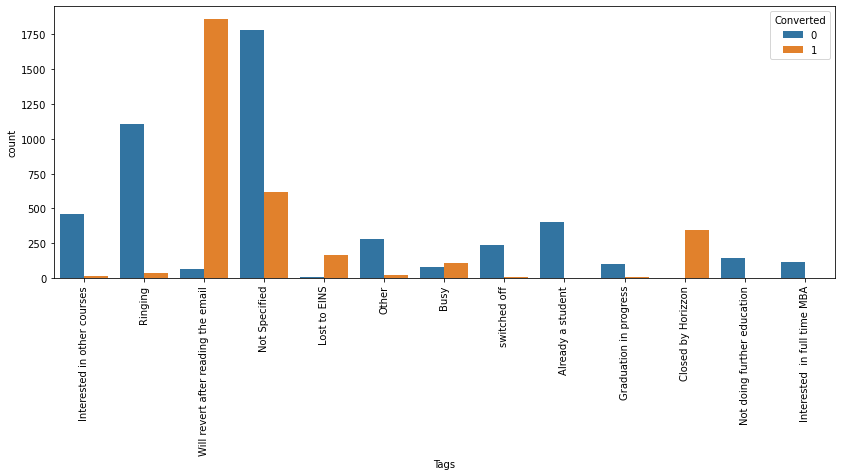

In [34]:
# Plottin again countplot for Tags vs Converted  to understand the distribution
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Tags", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [35]:
# chekcing value counts for 'What matters most to you in choosing a course'
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      5986
NaN                          1970
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [36]:
# Replacing null value with mode value of 'What matters most to you in choosing a course' column
mode = leads['What matters most to you in choosing a course'].mode()
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna(mode)

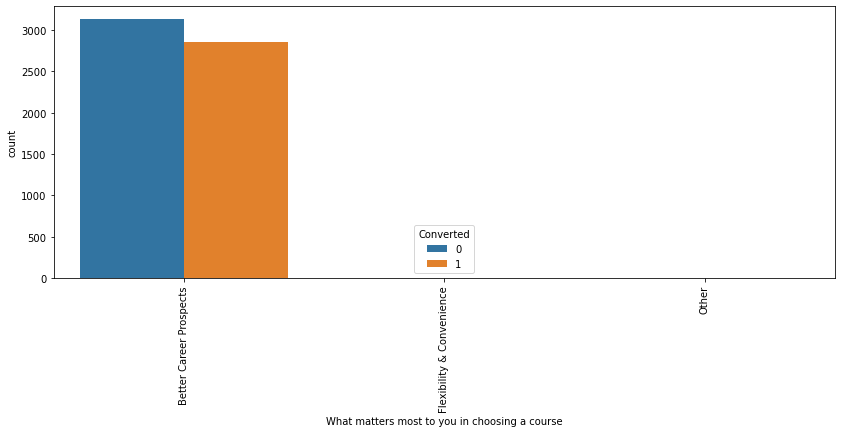

In [37]:
# Plottin countplot for What matters most to you in choosing a course vs Converted  to understand the distribution
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()


- Based on above chart, the data in the "What matters most to you in choosing a course" column is highly imbalanced and is not useful for our predictions.
- Therefore, we can drop this column as well.

In [38]:
# Dropping the column What matters most to you in choosing a course
leads.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [39]:
# checking value counts for 'What is your current occupation'
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5150
NaN                     1951
Working Professional     639
Student                  185
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [40]:
# checking mode for 'What is your current occupation'
leads['What is your current occupation'].mode()

0    Unemployed
dtype: object

In [41]:
# Replacing null value with 'Not Speficied' for 'What is your current occupation' column
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.NaN,'Not Speficied')

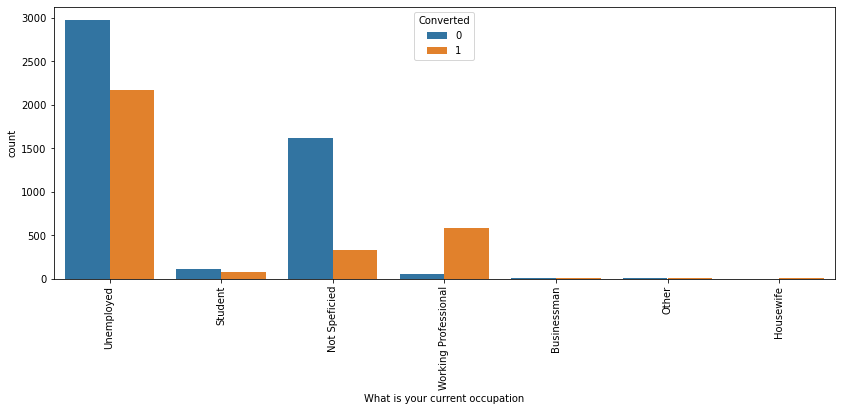

In [42]:
# Plottin countplot for 'What is your current occupation' vs Converted  to understand the distribution
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [43]:
# Merging less cont categories into Other category for more consice data
#Housewife                 10
#Businessman                8
leads['What is your current occupation'] =leads['What is your current occupation'].replace(['Housewife','Businessman'],'Other')

In [44]:
leads['What is your current occupation'].value_counts()

Unemployed              5150
Not Speficied           1951
Working Professional     639
Student                  185
Other                     34
Name: What is your current occupation, dtype: int64

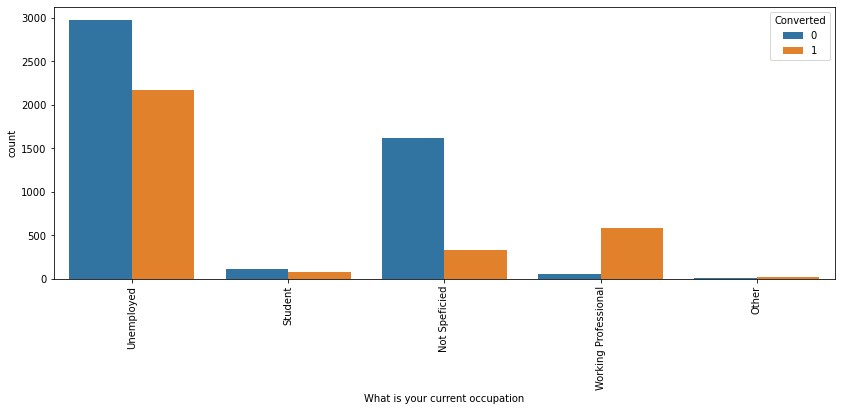

In [45]:
# Plottin again countplot for 'What is your current occupation' vs Converted  to understand the distribution
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [46]:
# checking value counts for 'Country' column
leads['Country'].value_counts(dropna=False, normalize=True) 

India                   0.815680
NaN                     0.148260
United States           0.008669
United Arab Emirates    0.006659
Singapore               0.003015
Saudi Arabia            0.002639
United Kingdom          0.001885
Australia               0.001633
Qatar                   0.001256
Bahrain                 0.000880
Hong Kong               0.000880
Oman                    0.000754
France                  0.000754
unknown                 0.000628
Nigeria                 0.000503
South Africa            0.000503
Germany                 0.000503
Kuwait                  0.000503
Canada                  0.000503
Sweden                  0.000377
China                   0.000251
Philippines             0.000251
Netherlands             0.000251
Asia/Pacific Region     0.000251
Uganda                  0.000251
Italy                   0.000251
Belgium                 0.000251
Bangladesh              0.000251
Ghana                   0.000251
Kenya                   0.000126
Tanzania  

In [47]:
# Replacing null value with mode value 'India' for Country column since more than 80% of data is India 
leads['Country'] = leads['Country'].fillna(leads['Country'].mode())

In [48]:
leads.Country.describe()

count      6780
unique       38
top       India
freq       6493
Name: Country, dtype: object

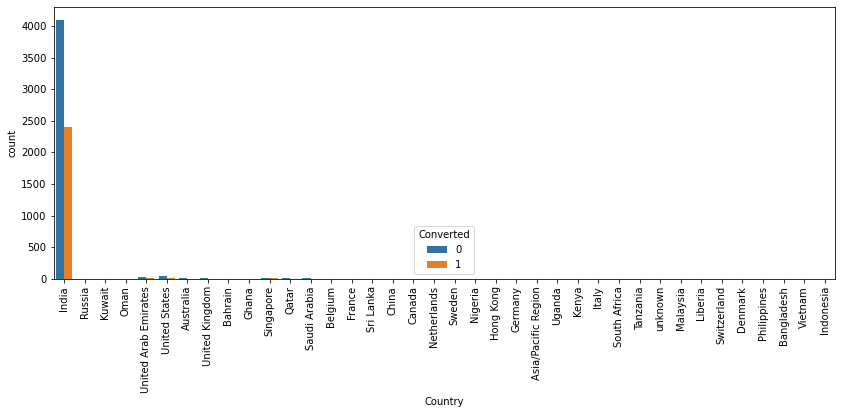

In [49]:
# Plottin countplot for City vs Converted  to understand the distribution
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Country", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

- As the Country column has more than 90% of values as India (highly imbalanced), this is not useful for our prediction. 
- Hence we can drop this column.

In [50]:
# Dropping the Country column as it's highly imbalanced.
leads.drop('Country',axis=1,inplace=True)

In [51]:
# checking value_counts for 'Page Views Per Visit' column
leads['Page Views Per Visit'].value_counts(dropna=False, normalize=True)

2.00    0.225531
3.00    0.150270
0.00    0.114085
4.00    0.112577
1.00    0.081794
          ...   
6.67    0.000126
8.33    0.000126
2.45    0.000126
2.08    0.000126
1.19    0.000126
Name: Page Views Per Visit, Length: 115, dtype: float64

In [52]:
# Replacing null values with median value for column 'Page Views Per Visit' 
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.NaN,leads['Page Views Per Visit'].median())

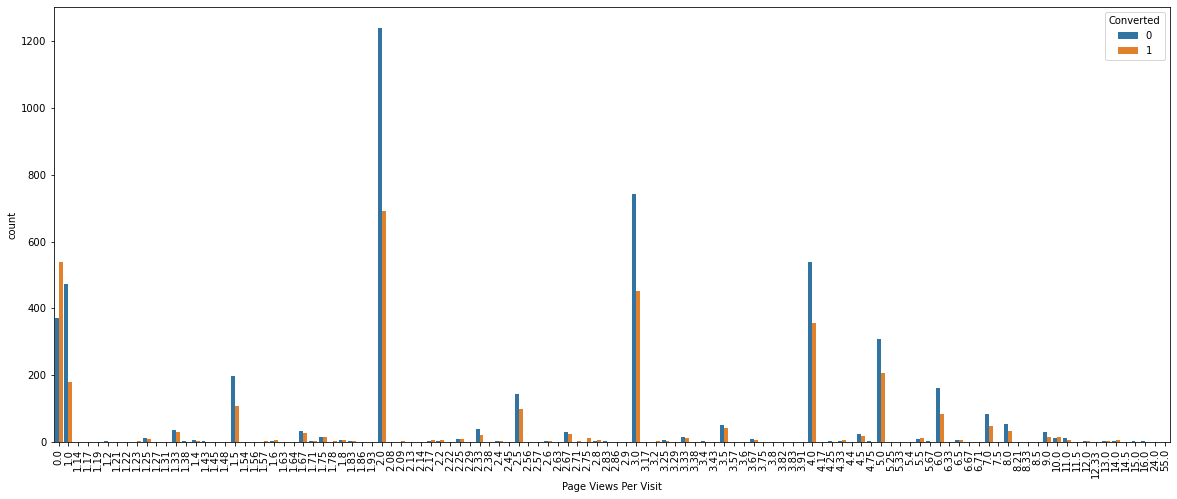

In [53]:
# Plottin countplot for Page Views Per Visit vs Converted  to understand the distribution
plt.figure(figsize = (20,8))
ax1=sns.countplot(x = "Page Views Per Visit", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [54]:
# checking value counts for  'TotalVisits' column
leads['TotalVisits'].value_counts(dropna=False, normalize=True)

2.0      0.211082
3.0      0.164091
4.0      0.140721
0.0      0.114085
5.0      0.098379
6.0      0.058550
1.0      0.049629
7.0      0.038824
8.0      0.028144
9.0      0.020606
NaN      0.017213
10.0     0.014323
11.0     0.010805
13.0     0.006031
12.0     0.005654
14.0     0.004523
16.0     0.002639
15.0     0.002262
17.0     0.002010
18.0     0.001885
20.0     0.001508
19.0     0.001131
23.0     0.000754
21.0     0.000754
27.0     0.000628
24.0     0.000628
25.0     0.000628
22.0     0.000377
29.0     0.000251
28.0     0.000251
26.0     0.000251
30.0     0.000126
115.0    0.000126
141.0    0.000126
74.0     0.000126
251.0    0.000126
41.0     0.000126
55.0     0.000126
32.0     0.000126
42.0     0.000126
43.0     0.000126
54.0     0.000126
Name: TotalVisits, dtype: float64

In [55]:
# Replacing null value  for 'TotalVisits' with median value
leads['TotalVisits'] = leads['TotalVisits'].replace(np.NaN,leads['TotalVisits'].median())

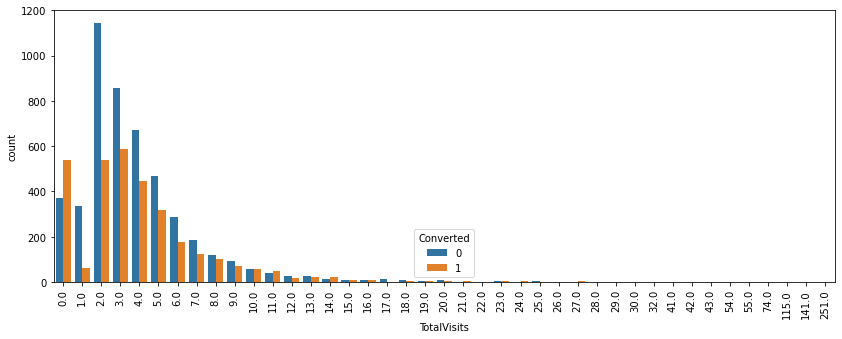

In [56]:
# Plottin countplot for TotalVisits vs Converted  to understand the distribution
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "TotalVisits", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [57]:
# Checking value counts for 'Last Activity'
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3043
SMS Sent                        2427
Page Visited on Website          635
Olark Chat Conversation          474
Converted to Lead                428
Email Bounced                    303
Email Link Clicked               225
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [58]:
# Checking mode value for 'Last Activity'
leads['Last Activity'].mode()

0    Email Opened
dtype: object

In [59]:
# Replacing null values with mode value for 'Last Activity' --mode
leads['Last Activity'] = leads['Last Activity'].replace(np.NaN,'Email Opened')

### Merging less count categories into Other for Last Activity column

    Approached upfront                 9
    View in browser link Clicked       6
    Email Received                     2
    Email Marked Spam                  2
    Visited Booth in Tradeshow         1
    Resubscribed to emails             1


In [60]:
# Replacing less count categories with Other for Last Activity column
leads['Last Activity'] = leads['Last Activity'].replace(['Approached upfront','View in browser link Clicked',                                                     
                                                'Email Received','Email Marked Spam','Visited Booth in Tradeshow',
                                                'Resubscribed to emails'],'Other')


In [61]:
leads['Last Activity'].value_counts()

Email Opened                 3146
SMS Sent                     2427
Page Visited on Website       635
Olark Chat Conversation       474
Converted to Lead             428
Email Bounced                 303
Email Link Clicked            225
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Other                          21
Name: Last Activity, dtype: int64

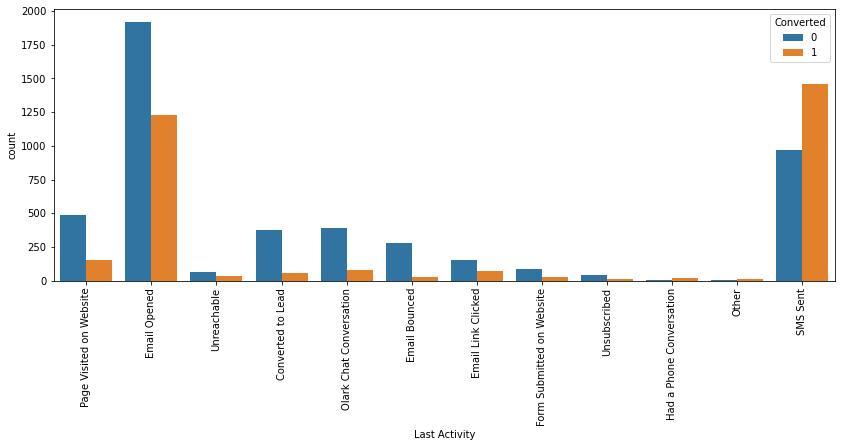

In [62]:
# Plottin again countplot for TotalVisits vs Converted  to understand the distribution
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [63]:
# Checking value counts for 'Lead Source'
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Organic Search       1154
Olark Chat            673
Reference             410
Referral Sites        125
Welingak Website       73
Facebook               52
NaN                    33
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
NC_EDM                  1
WeLearn                 1
welearnblog_Home        1
Pay per Click Ads       1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

- We can notice that there are 2 different rows with keyword Google & google. We can merge google with Google.

In [64]:
# Replacing google values with Google value for Lead Source
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

In [65]:
# checking mode value for 'Lead Source'
leads['Lead Source'].mode()

0    Google
dtype: object

In [66]:
# Replacing null values with mode value for Lead Source
leads['Lead Source'] = leads['Lead Source'].replace(np.NaN,'Google')

### Merging less count categories into Other for column Lead Source
    bing                    6
    google                  5
    Click2call              4
    Social Media            2
    Press_Release           2
    Live Chat               2
    Pay per Click Ads       1
    testone                 1
    youtubechannel          1
    NC_EDM                  1
    welearnblog_Home        1
    blog                    1
    WeLearn                 1

In [67]:
leads['Lead Source']=leads['Lead Source'].replace(['bing','google','Click2call','Social Media','Press_Release'
                                                  ,'Live Chat','Pay per Click Ads','testone'
                                                  ,'youtubechannel','NC_EDM','welearnblog_Home','blog','WeLearn'],'Other')

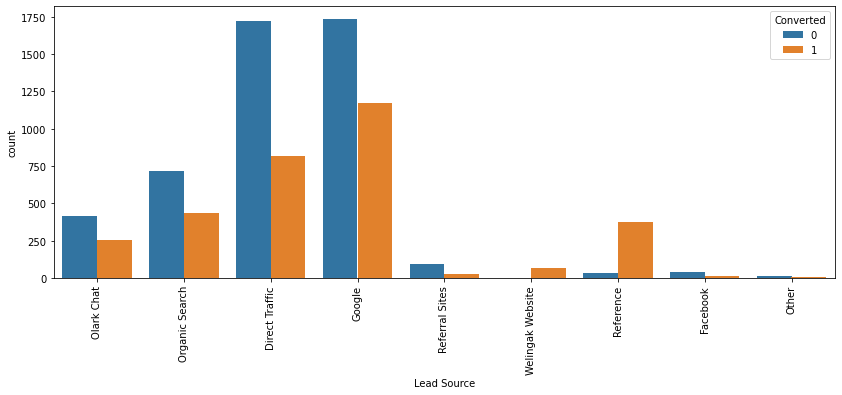

In [68]:
# Plottin countplot for Lead Source vs Converted  to understand the distribution
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

- From the chart, it is evident that the leads through References have the highest conversion rate.
- So Lead Source is one of the key columns in predictions.

In [69]:
# Re-checking list of columns having null values
nullcount = ((leads.isnull().sum())/len(leads))*100
nullcount.sort_values(nullcount[1],ascending=False)

Lead Origin                                 0.0
Lead Source                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

In [70]:
# Checking value counts for 'Last Notable Activity'
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        2847
Email Opened                    2506
SMS Sent                        1887
Page Visited on Website          313
Email Link Clicked               142
Olark Chat Conversation          105
Email Bounced                     59
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
Form Submitted on Website          1
Approached upfront                 1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

#### Merging less count categories into Other for Last Notable Activity column

    Email Marked Spam                  2
    View in browser link Clicked       1
    Email Received                     1
    Form Submitted on Website          1
    Resubscribed to emails             1
    Approached upfront                 1
    View in browser link Clicked       1

In [71]:
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Marked Spam','View in browser link Clicked'
                                                                        ,'Email Received','Form Submitted on Website','Resubscribed to emails',
                                                                        'View in browser link Clicked',
                                                                        'Approached upfront'],'Other')

In [72]:
# Checking value counts for 'Last Notable Activity'
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                    2847
Email Opened                2506
SMS Sent                    1887
Page Visited on Website      313
Email Link Clicked           142
Olark Chat Conversation      105
Email Bounced                 59
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
Other                          7
Name: Last Notable Activity, dtype: int64

In [73]:
# Verify size of data frame after removing null columns to see no rows have been deleted
leads.shape

(7959, 26)

###  UniVariate Analysis

In [74]:
# Saving numeric and categorical data types into different list for EDA
# cols_num holds columns having numeric data 
# cols_cat holds columns having categorical data
from pandas.api.types import is_numeric_dtype

cols_num=[]
cols_cat=[]
for i in leads.columns:
    if is_numeric_dtype(leads[i]):
        cols_num.append(i)
    else:
        cols_cat.append(i)
    
print("cols_num",cols_num)
print("cols_cat", cols_cat)

cols_num ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
cols_cat ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [75]:
len(cols_cat)

22

#### Plot univariate graphs for categorical data

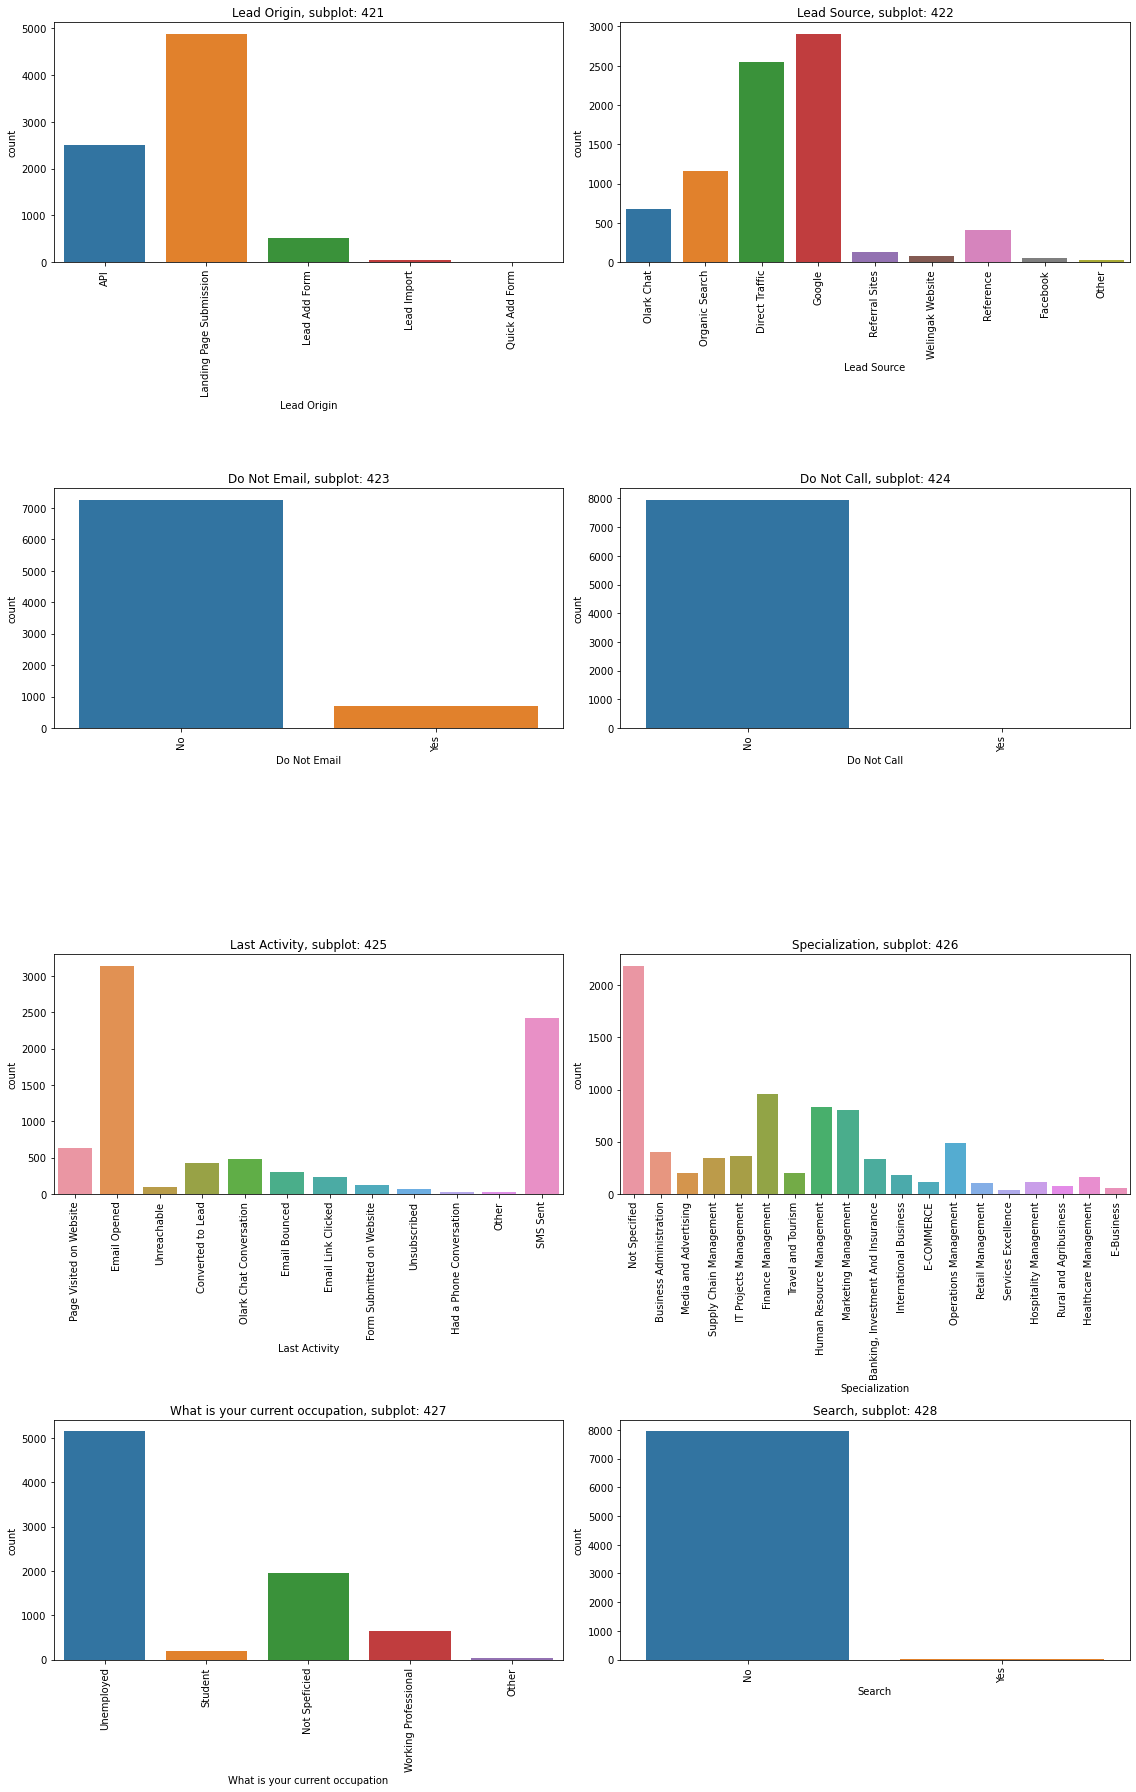

In [76]:
#Plot univariate graphs for categorical variables
a = 4 # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(16,25))

for i in cols_cat[0:8]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.tight_layout()
    plt.xticks(rotation=90)
    sns.countplot(leads[i])
    c = c + 1
plt.show()

- Inferences
  - Lead Origin
      - High number of leads originate from Landing Page Submission & API pages compared to other catergories
  - Lead Source
      - Google is the highest source of lead followed by Direct Traffic
  - Do Not Email
      - Data is highly imbalanced as majoirty leads are fine to be emailed. So this column may not be useful for prediction.
  - Do Not Call
      - Same as above. Almost everyone is fine to get calls about course. So this column as well can be ignored
  - Last Activity
      - Email Opened & SMS sent are the most recent activities performed by customers.
  - Specialization
      - Looks like customers are spread across different specilizations and majority are of Unnnown type who may be Student category looking for courses.
  - Occupation
      - Majoirty of unemployeed customers are intrested who might be Students.

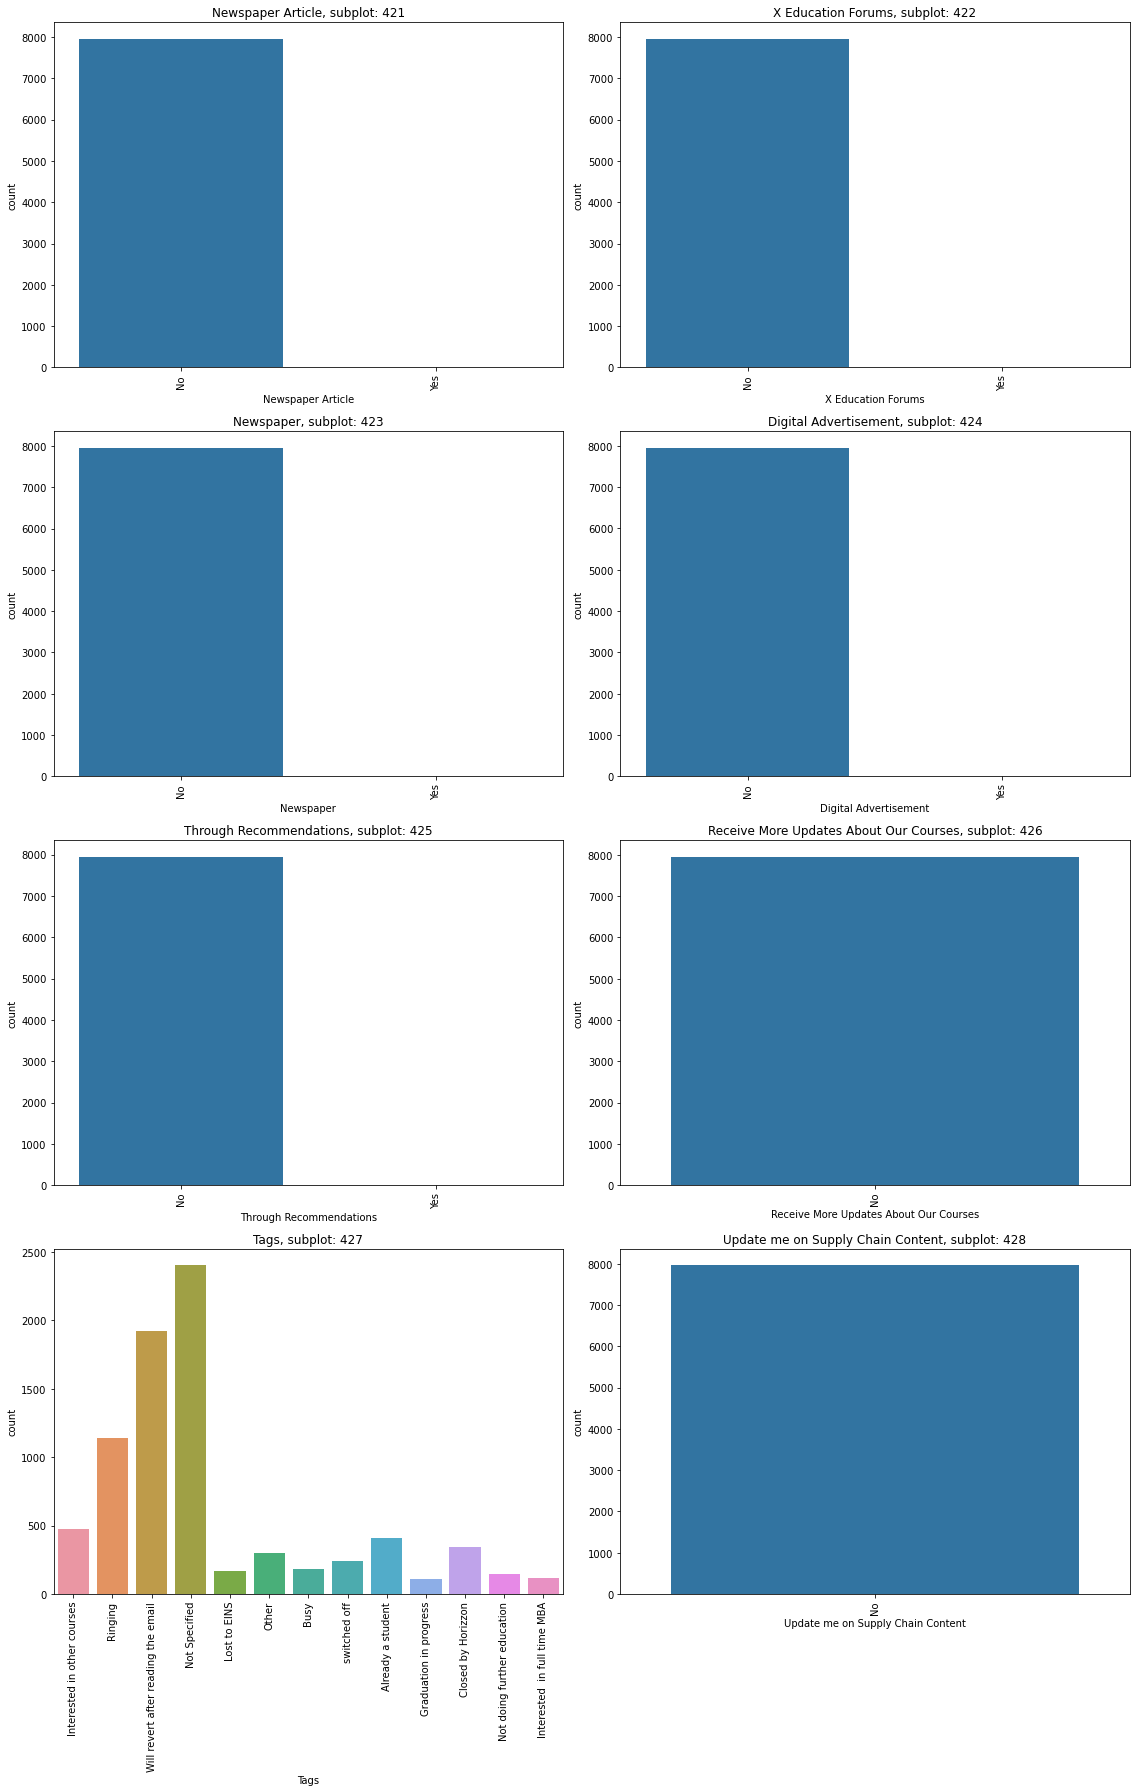

In [77]:
#Plot univariate graphs for remaining categorical variables
a = 4 # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(16,25))

for i in cols_cat[9:17]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.tight_layout()
    plt.xticks(rotation=90)
    sns.countplot(leads[i])
    c = c + 1
    #if c==9: break
plt.show()

#### Inferences
- It shows that Response is No for all  categories, which highly imbalanced. Pie charts for imbalanced
    - Search
    - Magazine
    - Newspaper Article
    - X Education Forums
    - Newspaper
    - Digital Advertisement
    - Through Recommendations
    - Receive More Updates About Our Courses
        
- We can ignore above columns for predections as they are not helpful for prediction

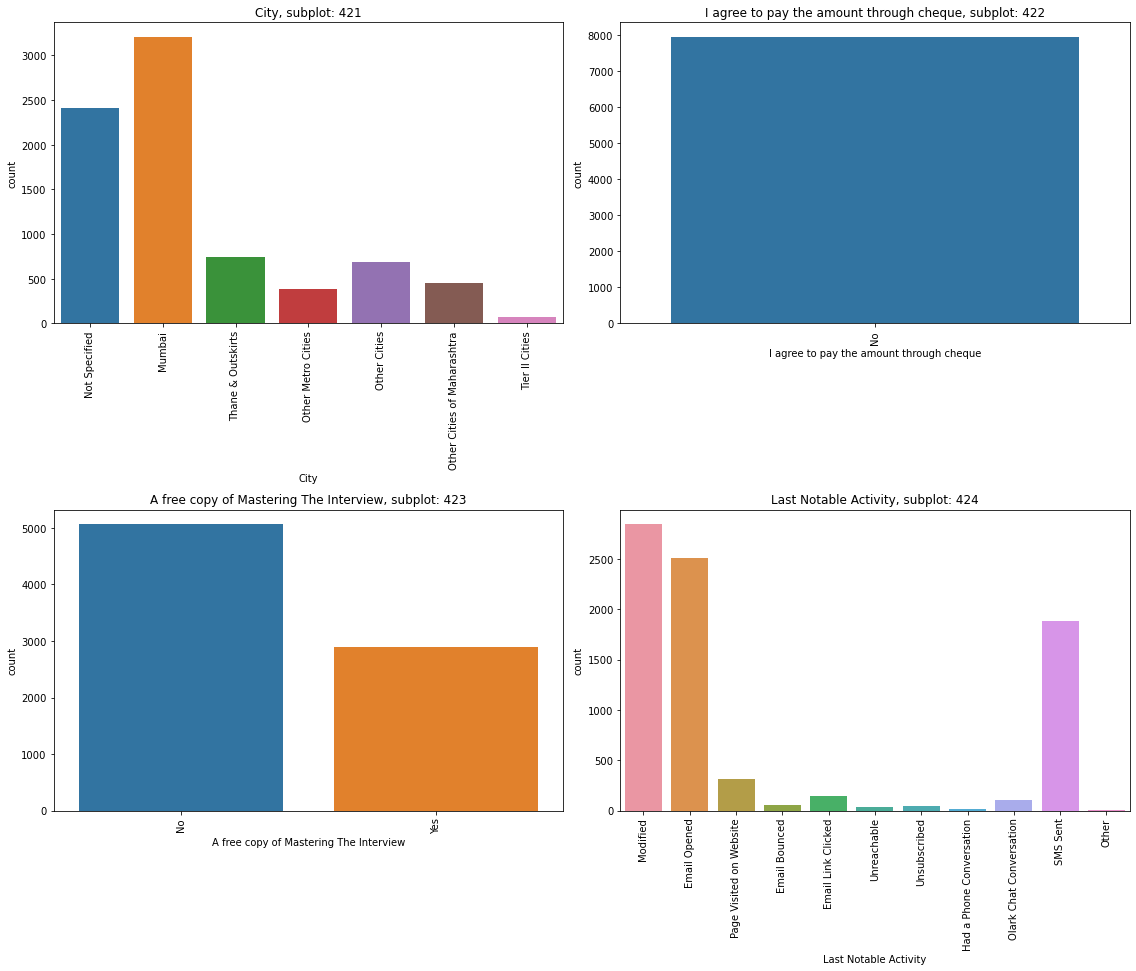

In [78]:
#Plot univariate graphs for remainining categorical variables
a = 4 # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(16,25))

for i in cols_cat[18:24]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.tight_layout()
    plt.xticks(rotation=90)
    sns.countplot(leads[i])
    c = c + 1
    #if c==9: break
plt.show()

- Inferences
    - The following columns are imbalanced having a single response value 'No', these can be ignored for predictions
        - Update me on Supply Chain Content
        - Get updates on DM Content
        - I agree to pay the amount through cheque
    - City
        - Highest number of leads belongs to Mumbai
    - a free copy of Mastering The Interview
        - Looks like data is balanced and Majority leads are not intrested in receiving copy of mastering interview who 
          may not be looking for job search
    - Last Notable Activity
        - Modified, Email Opened, SMS were highest activity performed. 

#### Dropping the following columns which are highly imbalanced as per above infereneces from plots:
  - Search
  - Magazine
  - Newspaper Article
  - X Education Forums
  - Newspaper
  - Digital Advertisement
  - Through Recommendations
  - Receive More Updates About Our Courses
  - Update me on Supply Chain Content
  - Get updates on DM Content
  - I agree to pay the amount through cheque
  - Do Not Email
  - Do Not Call

In [79]:
# Preparing list of columns to be dropped
cols_to_drop = ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',        
                'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
               'Do Not Email','Do Not Call']

In [80]:
# Drop the columns not required
leads.drop(cols_to_drop,axis=1,inplace=True)

In [81]:
leads.shape

(7959, 13)

#### Plot univariate graphs for Numerical data

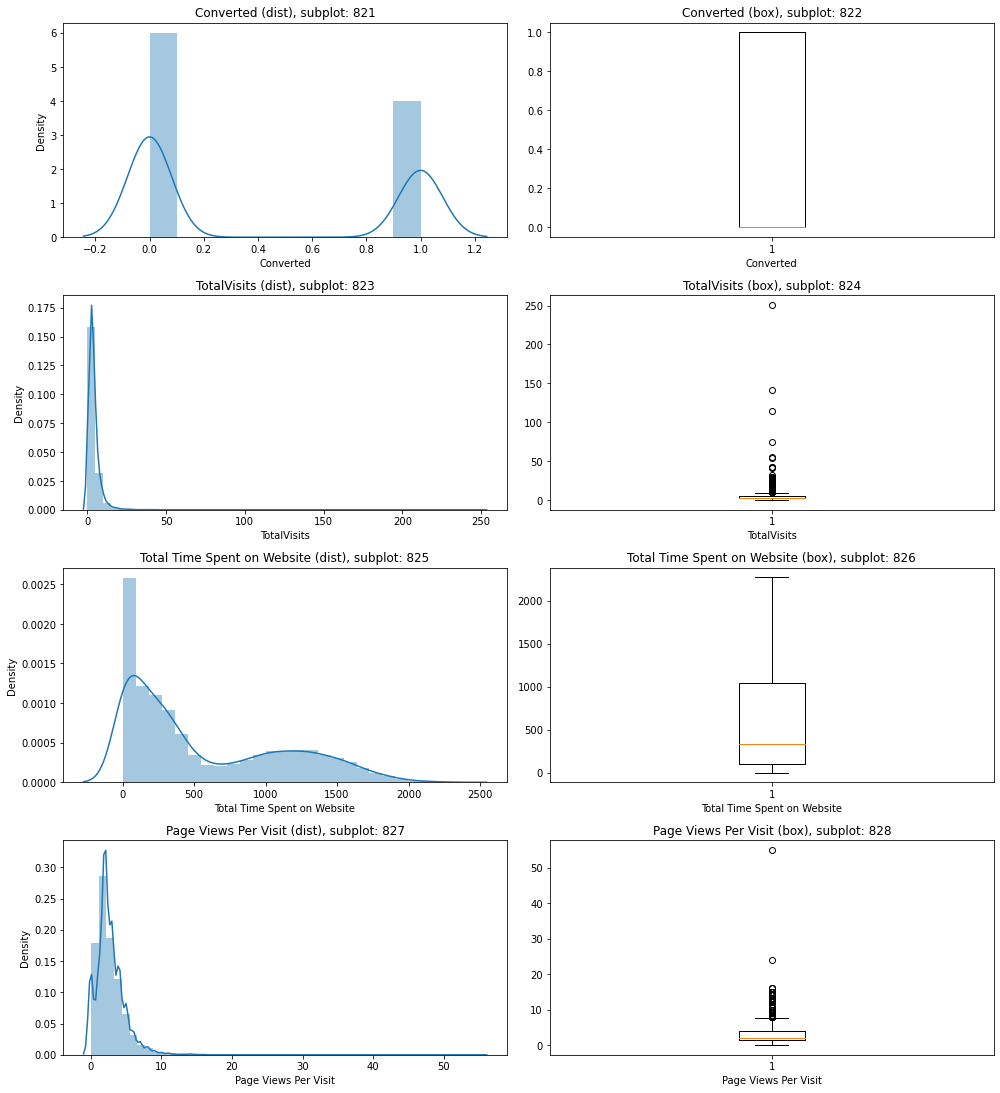

In [82]:
#Plot univariate graphs for Numerical data
a = 8  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,30))

for i in cols_num:
    plt.tight_layout()
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(leads[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = leads[i])
    c = c + 1

plt.show()

- Inferences
  - We can notice that there are outliers present for Total Visits & Page Views Per Visit. We can further analyze these columns for finding outliers

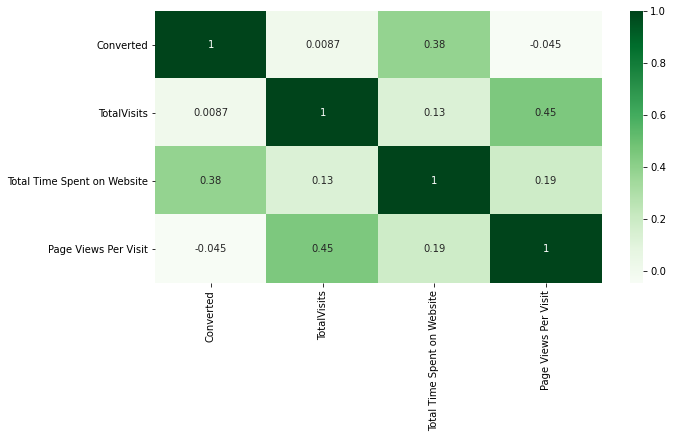

In [83]:
plt.figure(figsize=[10,5])
sns.heatmap(leads.corr(),annot=True,cmap="Greens")
plt.show()

### Bivariate Analysis

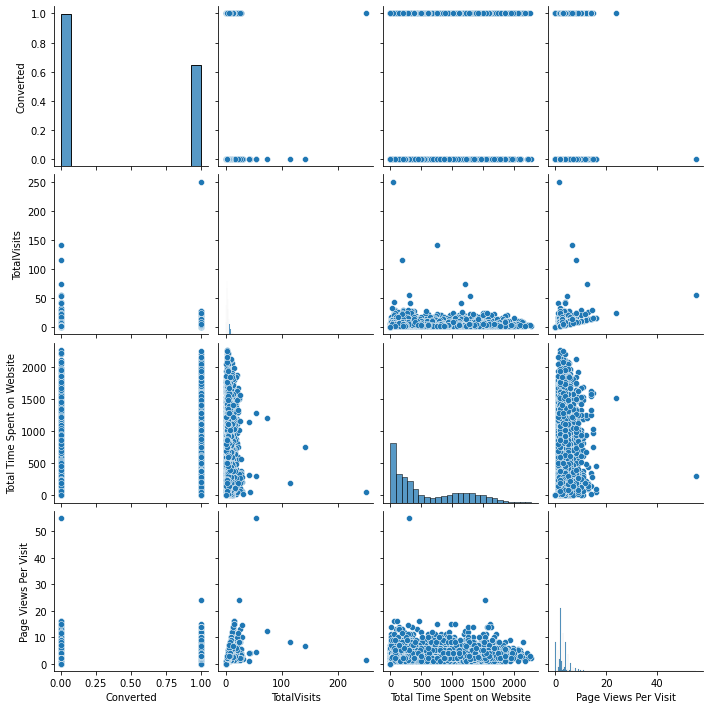

In [84]:
# Plotting pair plot for all variables
sns.pairplot(leads)
plt.show()

Based on above plots and analysis found below observations
- Total Visits & Page Views Per Visit are inter related data. Page Views per Visit is subset of Total Visits.
  Hence we can use only column which is super set Total Visits and Drop the Page Views per Visit. Also both has good  correlation

#### Data Redudancy Checks

Based on above plots and analysis found below observations
- Total Visits & Page Views Per Visit are inter related data. Page Views per Visit is subset of Total Visits.
  Hence we can use only column which is super set Total Visits and Drop the Page Views per Visit. Also both has good  correlation


In [85]:
leads.drop('Page Views Per Visit',axis=1,inplace=True)

####  Bivariate Analysis with Converted column

In [86]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

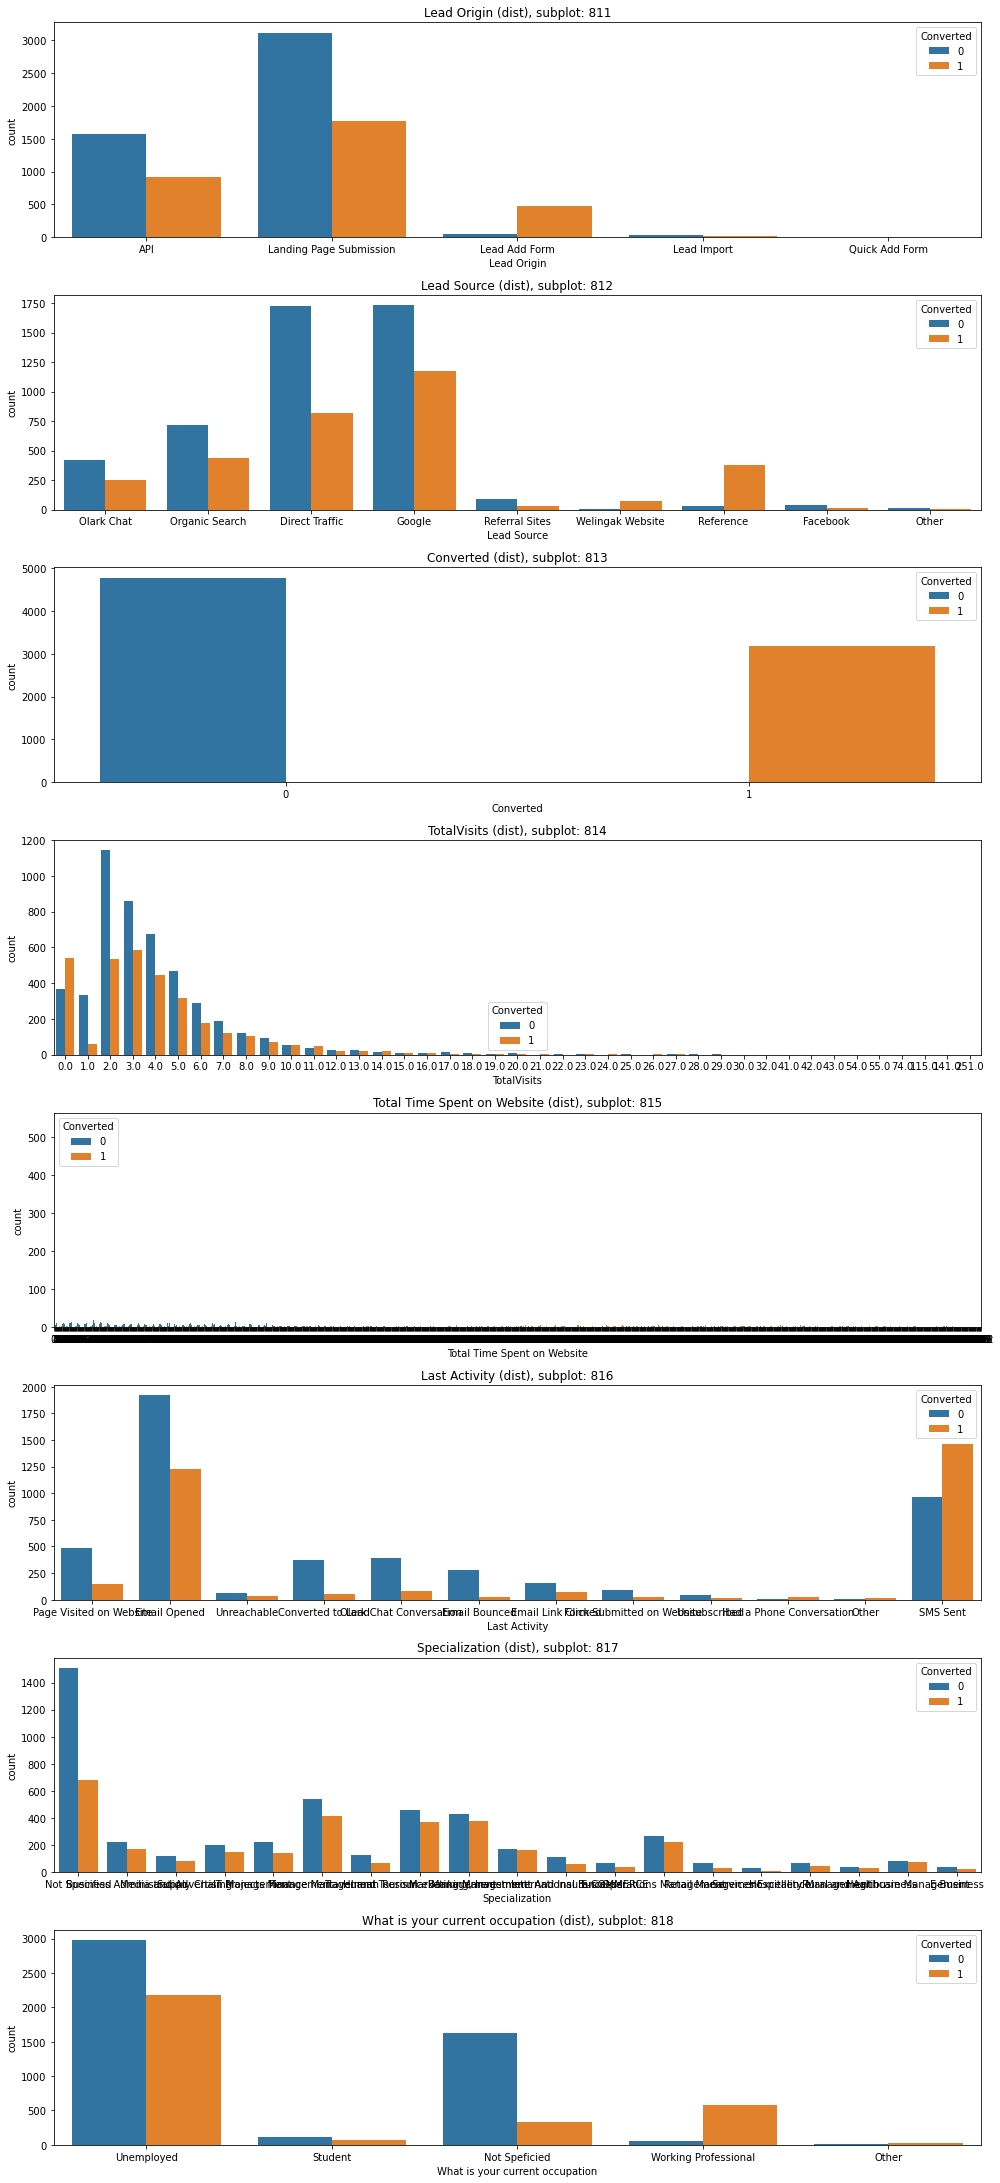

In [87]:
#Plot univariate graphs for Numerical data
a = 8  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,30))

for i in leads.columns:
    plt.tight_layout()
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(x = leads[i], hue = "Converted", data = leads)
    c = c + 1
    if c==9: break
plt.show()

## Step5 : Data Preparation

In [88]:
# Verifying the final data head
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Not Specified,No,Modified
1,API,Organic Search,0,5.0,674,Email Opened,Not Specified,Unemployed,Ringing,Not Specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


### Handling Yes/No categorical values

In [89]:
# List of variables to map
varlist =  ['A free copy of Mastering The Interview']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

### Creating dummies for categorical variables

In [90]:
# For categorical variables with multiple levels, create dummy features (one-hot encoded)
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source','Specialization', 'What is your current occupation', 'Tags','City', 'Last Notable Activity','Last Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [91]:
# Verifying head after creating dummies
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,Tags,City,...,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,API,Olark Chat,0,0.0,0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Not Specified,...,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,5.0,674,Email Opened,Not Specified,Unemployed,Ringing,Not Specified,...,0,1,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,...,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,1,2.0,1428,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Verifying list of columns created for dummies
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7959 entries, 0 to 9239
Data columns (total 85 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           7959 non-null   object 
 1   Lead Source                                           7959 non-null   object 
 2   Converted                                             7959 non-null   int64  
 3   TotalVisits                                           7959 non-null   float64
 4   Total Time Spent on Website                           7959 non-null   int64  
 5   Last Activity                                         7959 non-null   object 
 6   Specialization                                        7959 non-null   object 
 7   What is your current occupation                       7959 non-null   object 
 8   Tags                                                  7959

In [93]:
#Dropping the repeated variables
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source',  'Specialization', 'What is your current occupation', 'Tags','City', 'Last Notable Activity','Last Activity'], 1)

In [94]:
# Verifying head again
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,2.0,1532,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Checking for Outliers

In [95]:
leads_num = leads[['TotalVisits', 'Total Time Spent on Website']]

In [96]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads_num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website
count,7959.000000,7959.000000
mean,3.992084,566.193240
std,4.975089,551.563569
min,0.000000,0.000000
25%,2.000000,102.000000
50%,3.000000,332.000000
75%,5.000000,1042.500000
90%,8.000000,1428.200000
95%,10.000000,1591.100000
99%,18.000000,1851.420000


- It clearly shows that outliers present for TotalVisits column

### Removing Outliers for TotalVisits column

In [97]:
# Finding 10th and 90th percentile and calculating lower and upper boundaries to remove the outliers
q1 = leads.TotalVisits.quantile(0.10)
q3 = leads.TotalVisits.quantile(0.90)
iqr = q3-q1
lower  = q1-1.5*iqr
upper  = q3+1.5*iqr
    
leads = leads.loc[(leads['TotalVisits'] > lower) & (leads['TotalVisits'] < upper)]

In [98]:
# Re checking after removing outliers
leads['TotalVisits'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    7900.000000
mean        3.769494
std         2.987403
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        14.010000
max        19.000000
Name: TotalVisits, dtype: float64

- Now outliers are removed for TotalVisits column

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef2679f8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef2018b6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef2679fe20>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef23939820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef2396a820>],
 'means': []}

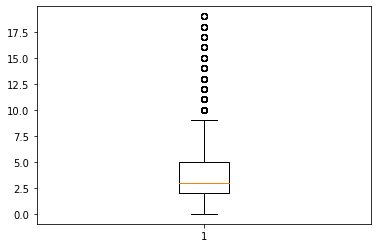

In [99]:
# Plotting box plot again for TotalVisits after removal of outliers
plt.boxplot(x = leads['TotalVisits'])

<AxesSubplot:xlabel='TotalVisits', ylabel='Density'>

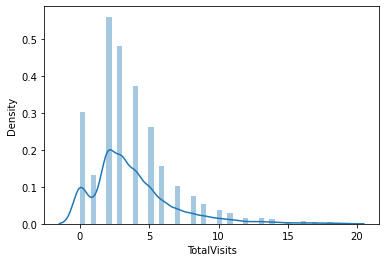

In [100]:
# Plotting distplot for TotalVisits after removal of outliers
sns.distplot(leads['TotalVisits'])

### Correlation Matrix with Converted column

In [101]:
# Checking correlation with Converted column against all other columns
leads_corr=leads.corr()['Converted'].to_frame('correlation')
leads_corr.sort_values('correlation',ascending=False).head(10)

,correlation
Converted,1.000000
Tags_Will revert after reading the email,0.653036
Total Time Spent on Website,0.384891
Last Notable Activity_SMS Sent,0.307172
What is your current occupation_Working Professional,0.306460
Lead Origin_Lead Add Form,0.280754
Last Activity_SMS Sent,0.274442
Tags_Closed by Horizzon,0.257656
Lead Source_Reference,0.247769
Tags_Lost to EINS,0.175118


- We can see that below are top variables having high correlation with converted column

    Tags_Will revert after reading the email	0.653036
    
    Total Time Spent on Website	0.384891
    
    Last Notable Activity_SMS Sent	0.307172
    
    What is your current occupation_Working Professional	0.306460
    
    Lead Origin_Lead Add Form	0.280754
    
    Last Activity_SMS Sent	0.274442
    
    Tags_Closed by Horizzon	0.257656
    
    Lead Source_Reference	0.247769
    
    Tags_Lost to EINS	0.175118
    

## Step 6: Test-Train Split

In [102]:
# Importing required libraries
from sklearn.model_selection import train_test_split

In [103]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,0.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,5.0,674,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2.0,1532,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,305,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [105]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 7: Feature Scaling

In [106]:
# Importing required libraries
from sklearn.preprocessing import StandardScaler

In [107]:
# Performing scaling for numeric columns
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
6809,0.740541,-0.771812,-0.748294,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1064,0.072647,-0.779075,-0.748294,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2260,1.074488,-0.773628,-0.748294,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5765,0.072647,-0.510319,-0.748294,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,-0.261300,-0.114447,-0.748294,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [108]:
### Checking the converted Rate
convertedRate = (sum(leads['Converted'])/len(leads['Converted'].index))*100
convertedRate

39.98734177215189

- We can see that current Converted rate is only 40%

## Step 8: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [109]:
# Importing required library
import statsmodels.api as sm

In [110]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5530
Model:                            GLM   Df Residuals:                     5453
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -871.52
Date:                Mon, 12 Jul 2021   Deviance:                       1743.0
Time:                        17:11:41   Pearson chi2:                 8.16e+03
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -27.3130   1.87e+04     -0.001      0.999   -3.67e+04    3.67e+04
TotalVisits                                              0.1045      0.076      1.377      0.169      -0.044       0.253
Total Time Spent on Website                              1.1239      0.070     16.091      0.000       0.987       1.261
A free copy of Mastering The Interview                   0.0001      0.095      0.002      0.999      -0.187       0.187
Lead Origin_Landing Page Submission                     -0.2147      0.276     -0.779      0.436      -0.755       0.326
Lead Origin_Lead Add Form                                1.4740      0.903      1.632      0.103      -0.296       3.244
Lead Origin_Lead Import                                -21.9267   3.56e+05  -6.16e-05      1.000   -6.98e+05    6.98e+05
Lead Origin_Quick Add Form                              25.4846   3.56e+05   7.16e-05      1.000   -6.98e+05    6.98e+05
Lead Source_Facebook                                    21.7308   3.56e+05    6.1e-05      1.000   -6.98e+05    6.98e+05
Lead Source_Google                                       0.0816      0.204      0.400      0.689      -0.318       0.482
Lead Source_Olark Chat                                   0.8778      0.311      2.820      0.005       0.268       1.488
Lead Source_Organic Search                               0.1519      0.227      0.668      0.504      -0.294       0.598
Lead Source_Other                                        1.0037      1.090      0.921      0.357      -1.133       3.140
Lead Source_Reference                                   -0.5608      1.012     -0.554      0.579      -2.544       1.423
Lead Source_Referral Sites                               0.1798      0.486      0.370      0.711      -0.772       1.132
Lead Source_Welingak Website                             2.4712      1.375      1.797      0.072      -0.224       5.167
Specialization_Business Administration                   0.3745      0.420      0.892      0.373      -0.449       1.197
Specialization_E-Business                               -0.7717      0.768     -1.005      0.315      -2.277       0.734
Specialization_E-COMMERCE                                0.6156      0.570      1.080      0.280      -0.502       1.733
Specialization_Finance Management                       -0.2266      0.377     -0.601      0.548      -0.966       0.513
Specialization_Healthcare Management                    -0.3999      0.583     -0.686      0.492      -1.542       0.742
Specialization_Hospitality Management                   -0.3004      0.573     -0.524      0.600      -1.423       0.823
Specialization_Human Resource Management                 0

## Step 9: Feature Selection Using RFE

In [111]:
# Importing required library and creating logreg object 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [112]:
# Running RFE with 15 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [113]:
# Printing rfe output
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False])

In [114]:
# Verifying rfe selected columns with ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 42),
 ('Total Time Spent on Website', False, 3),
 ('A free copy of Mastering The Interview', False, 57),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 34),
 ('Lead Origin_Quick Add Form', False, 40),
 ('Lead Source_Facebook', False, 55),
 ('Lead Source_Google', False, 47),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Other', False, 23),
 ('Lead Source_Reference', False, 30),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 18),
 ('Specialization_E-Business', False, 22),
 ('Specialization_E-COMMERCE', False, 16),
 ('Specialization_Finance Management', False, 51),
 ('Specialization_Healthcare Management', False, 43),
 ('Specialization_Hospitality Management', False, 52),
 ('Specialization_Human Resource Management', False, 37),
 ('Specializ

In [115]:
# Saving list of columns selected by rfe into col variable for further usage
col = X_train.columns[rfe.support_]

In [116]:
# Printing col list
col

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent'],
      dtype='object')

## Step 10: Assessing the model with StatsModels

### Model 1

In [117]:
# Building model with RFE selected columns as model1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5530
Model:                            GLM   Df Residuals:                     5514
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1070.4
Date:                Mon, 12 Jul 2021   Deviance:                       2140.8
Time:                        17:11:44   Pearson chi2:                 6.64e+03
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.4238      0.264    -20.526      0.000      -5.942      -4.906
Lead Source_Welingak Website                             3.2877      1.052      3.124      0.002       1.225       5.350
What is your current occupation_Unemployed               2.0925      0.153     13.695      0.000       1.793       2.392
What is your current occupation_Working Professional     1.8073      0.364      4.970      0.000       1.095       2.520
Tags_Busy                                                2.7161      0.292      9.311      0.000       2.144       3.288
Tags_Closed by Horizzon                                 31.1813   2.22e+04      0.001      0.999   -4.34e+04    4.35e+04
Tags_Lost to EINS                                        9.2670      0.661     14.018      0.000       7.971      10.563
Tags_Not Specified                                       3.6561      0.241     15.186      0.000       3.184       4.128
Tags_Not doing further education                       -22.2160   3.32e+04     -0.001      0.999    -6.5e+04     6.5e+04
Tags_Ringing                                            -1.3112      0.315     -4.163      0.000      -1.929      -0.694
Tags_Will revert after reading the email                 7.1985      0.285     25.282      0.000       6.640       7.757
Tags_switched off                                       -1.7347      0.625     -2.776      0.005      -2.959      -0.510
Last Notable Activity_Modified                          -1.5825      0.137    -11.587      0.000      -1.850      -1.315
Last Notable Activity_Olark Chat Conversation           -1.3385      0.503     -2.660      0.008      -2.325      -0.352
Last Activity_Email Bounced                             -1.1104      0.409     -2.714      0.007      -1.912      -0.309
Last Activity_SMS Sent                                   1.9009      0.126     15.037      0.000       1.653       2.149
========================================================================================================================
"""

- We can see the few columns are having high P values which needs to be dropped further in next steps

In [118]:
# Importing required library
from sklearn import metrics

### Checking VIFs for Model 1

In [119]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.22
10,Tags_switched off,1.14
3,Tags_Busy,1.13
13,Last Activity_Email Bounced,1.12
7,Tags_Not doing further education,1.11
5,Tags_Lost to EINS,1.07
0,Lead Source_Welingak Website,1.04
12,Last Notable Activity_Olark Chat Conversation,1.03
2,What is your current occupation_Working Profes...,0.66
11,Last Notable Activity_Modified,0.16


- We can see that all VIF values are in good range. 

### Model 2

In [121]:
# Removing Tags_Closed by Horizzon given as its having high p value and high VIF value
col = col.drop('Tags_Closed by Horizzon')
col

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent'],
      dtype='object')

In [122]:
# Building model2 after dropping column 'Tags_Closed by Horizzon'
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5530
Model:                            GLM   Df Residuals:                     5515
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1583.5
Date:                Mon, 12 Jul 2021   Deviance:                       3167.0
Time:                        17:11:44   Pearson chi2:                 6.39e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9982      0.166    -18.063      0.000      -3.324      -2.673
Lead Source_Welingak Website                             4.4884      1.032      4.348      0.000       2.465       6.512
What is your current occupation_Unemployed               1.8276      0.136     13.402      0.000       1.560       2.095
What is your current occupation_Working Professional     3.7188      0.254     14.640      0.000       3.221       4.217
Tags_Busy                                                0.7473      0.217      3.440      0.001       0.321       1.173
Tags_Lost to EINS                                        6.3668      0.620     10.267      0.000       5.151       7.582
Tags_Not Specified                                       1.3132      0.143      9.164      0.000       1.032       1.594
Tags_Not doing further education                       -22.7011   1.22e+04     -0.002      0.999   -2.39e+04    2.39e+04
Tags_Ringing                                            -3.1416      0.257    -12.226      0.000      -3.645      -2.638
Tags_Will revert after reading the email                 4.5510      0.191     23.828      0.000       4.177       4.925
Tags_switched off                                       -3.5069      0.596     -5.884      0.000      -4.675      -2.339
Last Notable Activity_Modified                          -0.8993      0.099     -9.041      0.000      -1.094      -0.704
Last Notable Activity_Olark Chat Conversation           -1.3234      0.438     -3.023      0.003      -2.182      -0.465
Last Activity_Email Bounced                             -1.4170      0.354     -4.008      0.000      -2.110      -0.724
Last Activity_SMS Sent                                   1.3639      0.105     13.000      0.000       1.158       1.570
========================================================================================================================
"""

- We can see that one column is having high p value

### Checking VIFs for model 2

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_switched off,1.13
3,Tags_Busy,1.12
12,Last Activity_Email Bounced,1.12
6,Tags_Not doing further education,1.10
4,Tags_Lost to EINS,1.06
0,Lead Source_Welingak Website,1.03
11,Last Notable Activity_Olark Chat Conversation,1.03
2,What is your current occupation_Working Profes...,0.60
10,Last Notable Activity_Modified,0.16
13,Last Activity_SMS Sent,0.15


### Model 3

In [124]:
# Removing Tags_Not doing further education in Next batch as its having high p value 
col = col.drop('Tags_Not doing further education')
col

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Lost to EINS', 'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent'],
      dtype='object')

In [125]:
# Building model3 after removing column 'Tags_Not doing further education'
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5530
Model:                            GLM   Df Residuals:                     5516
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1598.1
Date:                Mon, 12 Jul 2021   Deviance:                       3196.1
Time:                        17:11:44   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0713      0.166    -18.508      0.000      -3.397      -2.746
Lead Source_Welingak Website                             4.5536      1.033      4.407      0.000       2.529       6.579
What is your current occupation_Unemployed               1.8253      0.137     13.360      0.000       1.558       2.093
What is your current occupation_Working Professional     3.7618      0.253     14.845      0.000       3.265       4.259
Tags_Busy                                                0.8257      0.217      3.806      0.000       0.400       1.251
Tags_Lost to EINS                                        6.4627      0.622     10.396      0.000       5.244       7.681
Tags_Not Specified                                       1.3921      0.143      9.730      0.000       1.112       1.672
Tags_Ringing                                            -3.0656      0.257    -11.942      0.000      -3.569      -2.562
Tags_Will revert after reading the email                 4.6345      0.191     24.284      0.000       4.260       5.009
Tags_switched off                                       -3.4304      0.596     -5.756      0.000      -4.598      -2.262
Last Notable Activity_Modified                          -0.9113      0.099     -9.194      0.000      -1.106      -0.717
Last Notable Activity_Olark Chat Conversation           -1.3098      0.439     -2.982      0.003      -2.171      -0.449
Last Activity_Email Bounced                             -1.5095      0.344     -4.382      0.000      -2.185      -0.834
Last Activity_SMS Sent                                   1.3625      0.104     13.039      0.000       1.158       1.567
========================================================================================================================
"""

- We can see that all p values are in good range

### Checking VIFS for model 3

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_switched off,1.12
3,Tags_Busy,1.11
11,Last Activity_Email Bounced,1.08
4,Tags_Lost to EINS,1.06
0,Lead Source_Welingak Website,1.03
10,Last Notable Activity_Olark Chat Conversation,1.03
2,What is your current occupation_Working Profes...,0.60
9,Last Notable Activity_Modified,0.16
12,Last Activity_SMS Sent,0.15
7,Tags_Will revert after reading the email,0.11


- Now model is stable all P values and VIF values are good. No further column to drop. We can move on to metrics.

In [127]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6809    0.103649
1064    0.157203
2260    0.020625
5765    0.103649
9238    0.421473
1942    0.208886
680     0.069752
1474    0.013235
2326    0.922737
7461    0.226523
dtype: float64

In [128]:
# Reshaping y_train_pred into array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10364876, 0.15720257, 0.02062492, 0.10364876, 0.42147284,
       0.20888636, 0.06975155, 0.01323515, 0.92273742, 0.22652277])

In [129]:
# Converting into data frame with required columns from y_train & y_train_pred
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustomerID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustomerID
0,0,0.103649,6809
1,0,0.157203,1064
2,0,0.020625,2260
3,0,0.103649,5765
4,1,0.421473,9238


In [130]:
# Calculating predicted values based on 0.5 cut off value intially
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustomerID,predicted
0,0,0.103649,6809,0
1,0,0.157203,1064,0
2,0,0.020625,2260,0
3,0,0.103649,5765,0
4,1,0.421473,9238,0


In [131]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3139  183]
 [ 466 1742]]


In [132]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8826401446654611


### Metrics beyond simply accuracy

In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7889492753623188

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.9449127031908489

In [136]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.055087296809151115


In [137]:
# positive predictive value 
print (TP / float(TP+FP))

0.9049350649350649


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8707350901525659


## Step 11: Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [139]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

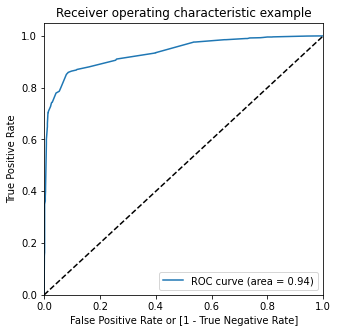

In [141]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Step 12: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [142]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustomerID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.103649,6809,0,1,1,0,0,0,0,0,0,0,0
1,0,0.157203,1064,0,1,1,0,0,0,0,0,0,0,0
2,0,0.020625,2260,0,1,0,0,0,0,0,0,0,0,0
3,0,0.103649,5765,0,1,1,0,0,0,0,0,0,0,0
4,1,0.421473,9238,0,1,1,1,1,1,0,0,0,0,0


In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.399277  1.000000  0.000000
0.1   0.1  0.669620  0.975543  0.466285
0.2   0.2  0.808318  0.910779  0.740217
0.3   0.3  0.878662  0.868207  0.885611
0.4   0.4  0.892948  0.851449  0.920530
0.5   0.5  0.882640  0.788949  0.944913
0.6   0.6  0.880289  0.743659  0.971102
0.7   0.7  0.877577  0.727808  0.977122
0.8   0.8  0.873599  0.703804  0.986454
0.9   0.9  0.851537  0.644475  0.989163


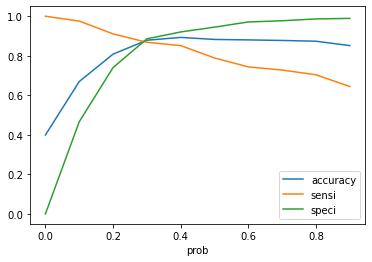

In [144]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [145]:
# Apply the optimul cut off probablity 0.3 on y_train_pred_final
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustomerID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.103649,6809,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.157203,1064,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.020625,2260,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.103649,5765,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.421473,9238,0,1,1,1,1,1,0,0,0,0,0,1


In [146]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8786618444846293

In [147]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2942,  380],
       [ 291, 1917]], dtype=int64)

In [148]:
# Calculating all metrics
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8682065217391305

In [150]:
# Let us calculate specificity
TN / float(TN+FP)

0.8856110776640578

In [151]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11438892233594221


In [152]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8345668262951677


In [153]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9099907206928549


### Precision and Recall

In [154]:
#Looking at the confusion matrix again

In [155]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3139,  183],
       [ 466, 1742]], dtype=int64)

##### Precision
TP / TP + FP

In [156]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9049350649350649

##### Recall
TP / TP + FN

In [157]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7889492753623188

Using sklearn utilities for the same

In [158]:
from sklearn.metrics import precision_score, recall_score

In [159]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9049350649350649

In [160]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7889492753623188

### Precision and recall tradeoff

In [161]:
from sklearn.metrics import precision_recall_curve

In [162]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 5525    1
 5526    1
 5527    0
 5528    0
 5529    1
 Name: Converted, Length: 5530, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5525    1
 5526    1
 5527    0
 5528    0
 5529    1
 Name: predicted, Length: 5530, dtype: int64)

In [163]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

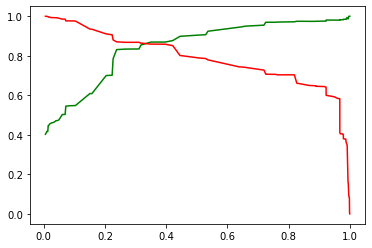

In [164]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 13: Making predictions on the test set

In [165]:
# Verifying test set columns
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_Not Specified',
   

In [166]:
# Preprating test data having only final selected features
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Activity_Email Bounced,Last Activity_SMS Sent
665,0,0,0,0,0,1,0,0,0,1,0,0,0
7218,0,1,0,0,0,0,1,0,0,0,0,0,1
363,0,0,0,0,0,1,0,0,0,0,0,0,0
5968,0,0,0,0,0,1,0,0,0,0,0,0,1
8356,0,1,0,0,0,0,0,0,0,0,0,0,0


In [167]:
# Adding constant to test set
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [168]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [169]:
# Printing head of y_test_pred
y_test_pred[:10]

665     0.069752
7218    0.049779
363     0.157203
5968    0.421473
8356    0.223393
8302    0.049779
4093    0.016302
7713    0.049779
2790    0.069752
211     0.922524
dtype: float64

In [170]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [171]:
# Let's see the head
y_pred_1.head()

,0
665,0.069752
7218,0.049779
363,0.157203
5968,0.421473
8356,0.223393


In [172]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [173]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [174]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [175]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [176]:
y_pred_final.head()

,Converted,CustID,0
0,0,665,0.069752
1,0,7218,0.049779
2,0,363,0.157203
3,1,5968,0.421473
4,0,8356,0.223393


In [177]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [178]:
# Printing head
y_pred_final.head()

,Converted,CustID,Converted_Prob
0,0,665,0.069752
1,0,7218,0.049779
2,0,363,0.157203
3,1,5968,0.421473
4,0,8356,0.223393


In [179]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Converted','Converted_Prob']]

In [180]:
# Printing head
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,665,0,0.069752
1,7218,0,0.049779
2,363,0,0.157203
3,5968,1,0.421473
4,8356,0,0.223393


In [181]:
# Calculating final_predicted probability
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [182]:
# Printing head
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,665,0,0.069752,0
1,7218,0,0.049779,0
2,363,0,0.157203,0
3,5968,1,0.421473,1
4,8356,0,0.223393,0


In [183]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8738396624472574

In [184]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1261,  158],
       [ 141,  810]], dtype=int64)

In [185]:
# Calculating metrics
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [186]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8517350157728707

In [187]:
# Let us calculate specificity
TN / float(TN+FP)

0.8886539816772375

## Step 14: Assigning a lead score between 0 and 100 

In [188]:
# Calculating score based on probability on final predicted data
y_pred_final['LeadScore']=y_pred_final['Converted_Prob']*100
y_pred_final.sort_values('LeadScore',ascending=False).head(50)

,CustID,Converted,Converted_Prob,final_predicted,LeadScore
615,4693,1,0.999964,1,99.996362
861,7482,1,0.999909,1,99.990899
1964,1365,1,0.999858,1,99.985792
2343,607,1,0.999774,1,99.977364
1779,737,1,0.999645,1,99.964464
1988,5784,1,0.999502,1,99.950201
1068,3829,1,0.999218,1,99.921833
823,7234,1,0.999116,1,99.911648
158,6666,1,0.998755,1,99.875516
1343,4947,1,0.998755,1,99.875516


In [189]:
# assiging lead score to original customers from test data
leads['LeadScore'] = y_pred_final['LeadScore']
leads['Converted_Pred']=y_pred_final['final_predicted']

In [190]:
# Calculating scores for train data as well
y_train_pred_final['LeadScore']=y_train_pred_final['Converted_Prob']*100
y_train_pred_final.sort_values('LeadScore',ascending=False).head(10)

,Converted,Converted_Prob,CustomerID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,LeadScore
2118,1,0.999964,2354,1,1,1,1,1,1,1,1,1,1,1,1,99.996362
58,1,0.999909,6937,1,1,1,1,1,1,1,1,1,1,1,1,99.990899
1996,1,0.999858,1965,1,1,1,1,1,1,1,1,1,1,1,1,99.985792
1706,1,0.999645,1758,1,1,1,1,1,1,1,1,1,1,1,1,99.964464
2662,1,0.999645,7327,1,1,1,1,1,1,1,1,1,1,1,1,99.964464
3039,1,0.999645,8120,1,1,1,1,1,1,1,1,1,1,1,1,99.964464
649,1,0.999645,802,1,1,1,1,1,1,1,1,1,1,1,1,99.964464
4144,1,0.999645,6932,1,1,1,1,1,1,1,1,1,1,1,1,99.964464
1919,1,0.999502,2764,1,1,1,1,1,1,1,1,1,1,1,1,99.950201
3581,1,0.999502,3519,1,1,1,1,1,1,1,1,1,1,1,1,99.950201


In [191]:
# assiging lead score to original customers from train data
leads['LeadScore'] = y_train_pred_final['LeadScore']
leads['Converted_Pred']=y_train_pred_final['final_predicted']

In [192]:
# Displaying top 20 leads 
leads.sort_values('LeadScore',ascending=False).head(20)

,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,LeadScore,Converted_Pred
2118,1,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,99.996362,1.0
58,0,17.0,409,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,99.990899,1.0
1996,0,5.0,228,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,99.985792,1.0
3039,0,2.0,1048,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,99.964464,1.0
1706,0,5.0,314,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,99.964464,1.0
649,0,3.0,1458,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,99.964464,1.0
2662,1,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,99.964464,1.0
1423,1,2.0,1345,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,99.950201,1.0
3942,1,4.0,734,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,99.950201,1.0
4509,0,5.0,608,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,99.943562,1.0


#### Correlation matrix with final predicted converted column

In [193]:
# Checking correlation with Converted column against all other columns
leads_corr=leads.corr()['Converted_Pred'].to_frame('correlation')
leads_corr.sort_values('correlation',ascending=False).head(20)

,correlation
Converted_Pred,1.000000
LeadScore,0.910206
Last Notable Activity_Email Opened,0.036590
Specialization_Media and Advertising,0.032060
Tags_Busy,0.026455
Lead Source_Google,0.024178
Last Notable Activity_Unreachable,0.021408
Tags_switched off,0.014643
Last Activity_Email Opened,0.014618
Lead Source_Referral Sites,0.014062


### Final Observations

__Train Data__

    Accuracy 87.8
    sensitivity 86.8
    specificity 88.6


__Test Data__

    Accuracy 87.4
    sensitivity 85
    specificity 88.8

### Final Model

p(Converted) = Lead Source_Welingak Website * 4.5536
\+ What is your current occupation_Unemployed * 1.8253
\+ What is your current occupation_Working Professional * 3.7618
\+ Tags_Busy * 0.8257
\+ Tags_Lost to EINS * 6.4627
\+ Tags_Not Specified * 1.3921
\- Tags_Ringing * 3.0656
\+ Tags_Will revert after reading the email * 4.6345
\- Tags_switched off * 3.4304
\- Last Notable Activity_Modified * 0.9113
\- Last Notable Activity_Olark Chat Conversation * 1.3098
\- Last Activity_Email Bounced * 1.5095
\+ Last Activity_SMS Sent * 1.3625



__Top Positive Coefficients__

    Tags_Lost to EINS
    
    Tags_Will revert after reading the email
    
    Lead Source_Welingak Website
    
    What is your current occupation_Working Professional
    
__Top Negative Coefficients__

    Tags_switched off
    
    Tags_Ringing
    
    Last Activity_Email Bounced
    